In [1]:
# Import data

import pandas as pd
churn = pd.read_csv('/Users/babs/Desktop/MBA/Data Mining/Telco-Customer-Churn-1.csv')

In [2]:
churn.shape

(7032, 20)

In [3]:
churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Check if there are missing variables in the dataset
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# How many values have yes/no for churn?
churn['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [7]:
# perform label encoding for categorical variables
x = pd.get_dummies(churn.iloc[:,0:19],drop_first=True)

In [8]:
x

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7028,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7029,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7030,4,74.40,306.60,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [9]:
# Encode target variable
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [10]:
y = labelencoder.fit_transform(churn['Churn'].values)

In [11]:
# Split target into training and test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [12]:
# Create Decision tree model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)

In [13]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
# Calculate model accuracy on training set
print('Accuracy on training set: {:.3f}'.format(tree.score(x_train,y_train)))

Accuracy on training set: 0.998


In [15]:
# Apply decision tree model on test set 
y_pred = tree.predict(x_test)

In [16]:
# Evaluate test set accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on test set: {:.3f}'.format(accuracy_score(y_pred,y_test)))
# Low accuracy on test set indicates an issue of overfitting

Accuracy on training set: 0.733


In [18]:
# Evaluate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[846 192]
 [183 186]]


/Users/babs/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


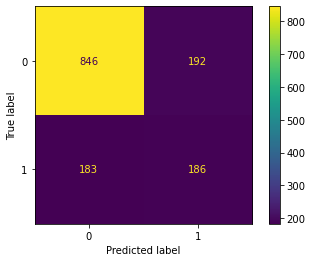

In [20]:
# Visualize confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree,x_test,y_test)

In [22]:
# Lets prune the tree model to reduce the effects of overfitting
tree_pruned= DecisionTreeClassifier(max_depth=4,random_state = 0)
tree_pruned.fit(x_train,y_train)
y_pruned_pred= tree_pruned.predict(x_test)

In [23]:
# Score new predictions
print('Accuracy on training set (pruned): {:.3f}'.format(tree_pruned.score(x_train,y_train)))
print('Accuracy on test set (pruned): {:.3f}'.format(accuracy_score(y_pruned_pred,y_test)))

Accuracy on training set (pruned): 0.791
Accuracy on test set (pruned): 0.785


In [24]:
# Visualizing and analyzing the tree
# Variable importance in decision tree
importance = pd.DataFrame(tree.feature_importances_, index = x.columns, columns = ['Importance'])
importance

,Importance
tenure,0.202008
MonthlyCharges,0.198780
TotalCharges,0.197211
gender_Male,0.025480
SeniorCitizen_yes,0.021220
Partner_Yes,0.019240
Dependents_Yes,0.019740
PhoneService_Yes,0.000542
MultipleLines_No phone service,0.003927
MultipleLines_Yes,0.020589


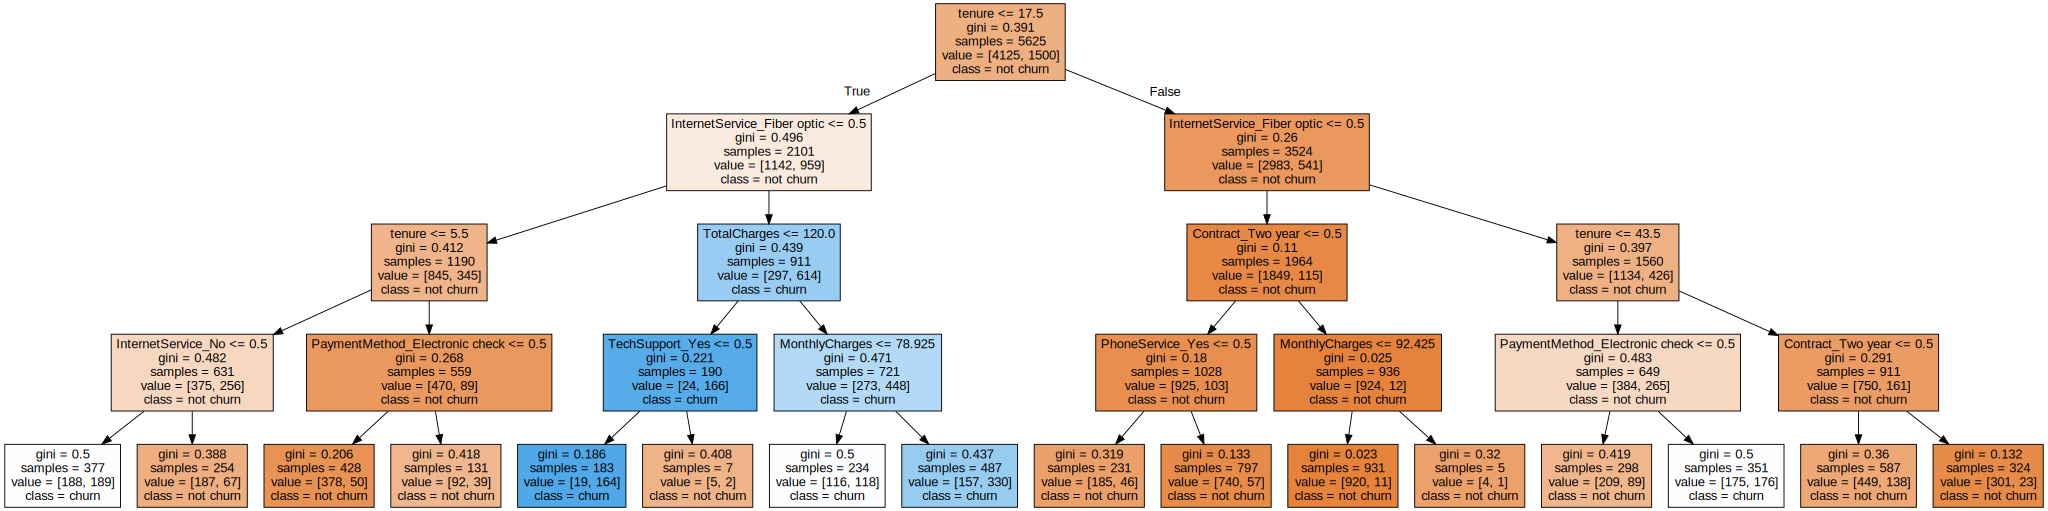

In [29]:
# visualize tree

from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree_pruned,
                          class_names = ['not churn','churn'],
                          feature_names = x_train.columns,
                          filled = True)

graph = graphviz.Source(dot_data,format = 'png')
graph

In [30]:
# Estimate predicted probability for test set 

tree_pruned.predict_proba(x_test)

array([[0.73622047, 0.26377953],
       [0.88317757, 0.11682243],
       [0.73622047, 0.26377953],
       ...,
       [0.4957265 , 0.5042735 ],
       [0.7649063 , 0.2350937 ],
       [0.88317757, 0.11682243]])

In [31]:
y_pruned_pred_proba= tree_pruned.predict_proba(x_test)[:,1]

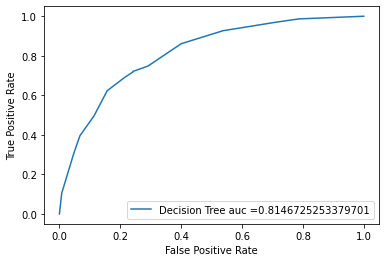

In [42]:
# Create ROC curve and calculate AUC value
from matplotlib import pyplot
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, _ = roc_curve (y_test, y_pruned_pred_proba)
auc = roc_auc_score(y_test,y_pruned_pred_proba)

pyplot.plot(fpr,tpr, label = 'Decision Tree auc ='+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show the legend
pyplot.legend()
pyplot.show()